In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

 # Soroll Impulsiu - Andreu Sanz Sanz

 ## Exercici 01

/home/andreuet/IABD/PIA/Classe/ut_03/NumPy/Practiques/Soroll_Impulsiu/img/img.png de dimensio (50, 50, 3)


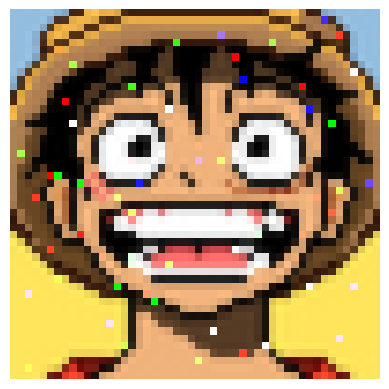

In [2]:
carpeta = os.path.join(os.getcwd(), 'img')
# carpeta = os.path.join(os.path.dirname(__file__), 'img')

p = 0.03
img_file = os.path.join(carpeta, 'img.png')
img_original_Image = Image.open(img_file)
img_original_array = np.array(img_original_Image)
img_corrupta_array = img_original_array.copy()
width, height, _ = img_original_array.shape

for i in range(1, width - 1):
    for j in range(1, height - 1):
        ran = np.random.rand()
        if ran%2==0:
            extrem = 0
        else:
            extrem = 255
        if ran < p:
            ran = np.random.rand()
            if ran < 0.10:
                img_corrupta_array[i, j] = extrem
            elif ran < 0.40:
                img_corrupta_array[i, j, 0] = extrem
            elif ran < 0.70:
                img_corrupta_array[i, j, 1] = extrem
            else:
                img_corrupta_array[i, j, 2] = extrem

print(f"{img_file} de dimensio {img_original_array.shape}")
plt.imshow(img_corrupta_array)
plt.axis('off')
plt.show()
img_contaminada = Image.fromarray(img_corrupta_array)
img_contaminada.save(os.path.join(carpeta, 'img_contaminada.png'))

 ## General

In [3]:

m, w,k = 0.2, 3, 1
distancia_de_pixel_finestra = w//2

def traure_finestra(matriu, posicio_x, posicio_y):
    finestra = []
    for l in range (-distancia_de_pixel_finestra, distancia_de_pixel_finestra + 1):
        for z in range (-distancia_de_pixel_finestra, distancia_de_pixel_finestra + 1):
            finestra.append(matriu[posicio_x+l][posicio_y+z])
    return finestra

# matriu = [
#         [1, 2, 3, 4],
#         [5, 6, 7, 8],
#         [9, 10, 11, 12],
#         [13, 14, 15, 16]
#     ]
# print(matriu[2][1])
# traure_finestra(matriu, 2,1)

 ## Exercici 02

 Tinc un dubte per a esta part, en l'activitat fem us de k pero no entenc el proposit de k, tambe magradaria saber quin es el algoritme exactament. com forme ho tinc fet jo funciona de la seguent manera per a cada pixel:
 Calcula la distancia per a cada pixel i despres calcula la mitja de les distancies, si la mitja es superiro a m akeshores detecta que el pixel es soroll.


In [4]:
def es_soroll(colors, m):
    referent = colors.pop(4)
    coinsidix = 0
    for i in colors:
        color1 = np.array(referent).astype(float)
        color2 = np.array(i).astype(float)
        dist = np.linalg.norm(color1 - color2)
        if dist < m: coinsidix = coinsidix + 1
        if coinsidix >= k: return not False
    return not True

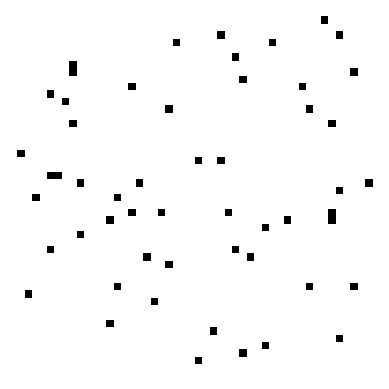

In [5]:
mascara_img = Image.new('1', (width, height), color=1)
mascara_array = np.array(mascara_img)
img_contaminada = Image.open(os.path.join(carpeta, 'img_contaminada.png'))
img_corrupta_array = np.array(img_contaminada)

for i in range(1, width - 1):
    for j in range(1, height - 1):
        finestra = traure_finestra(img_corrupta_array, i, j)
        # distancia, _ = calcular_distancia(finestra.copy())
        # if distancia > m: 
        #     mascara_array[i][j] = False
        mascara_array[i][j] = es_soroll(finestra.copy(), m*255)
mascara_img = Image.fromarray(mascara_array)
mascara_img.save(os.path.join(carpeta, 'img_mascara.png'))
plt.imshow(mascara_img, cmap='gray')
plt.axis('off')
plt.show()

 ## Exercici 03

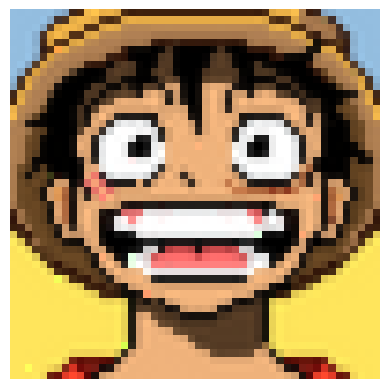

In [6]:
mascara_img = Image.open(os.path.join(carpeta, 'img_mascara.png'))
mascara_array = np.array(mascara_img)
solucio_array = img_corrupta_array.copy()
for i in range(1, width - 1):
    for j in range(1, height - 1):
        if mascara_array[i][j] == False:
            finestra = traure_finestra(img_corrupta_array, i, j)
            finestra.pop(4)
            finestra = np.array(finestra)
            
            canal_rojo = finestra[:, 0]
            canal_verde = finestra[:, 1]
            canal_azul = finestra[:, 2]

            # perque median i no mean?
            media_rojo = np.median(canal_rojo)
            media_verde = np.median(canal_verde)
            media_azul = np.median(canal_azul)

            color_medio = np.array([media_rojo, media_verde, media_azul])
            solucio_array[i][j] = color_medio

solucio_img = Image.fromarray(solucio_array)
solucio_img.save(os.path.join(carpeta, 'img_solucio.png'))
plt.imshow(solucio_img)
plt.axis('off')
plt.show()


Corrupta


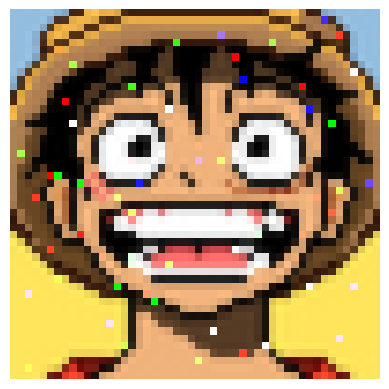

Corregida


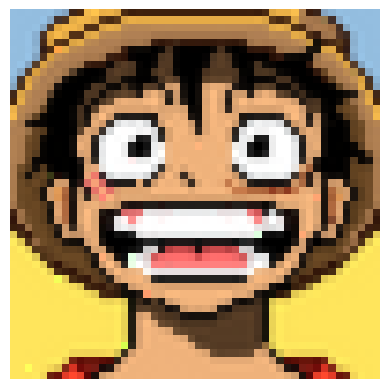

Mascara


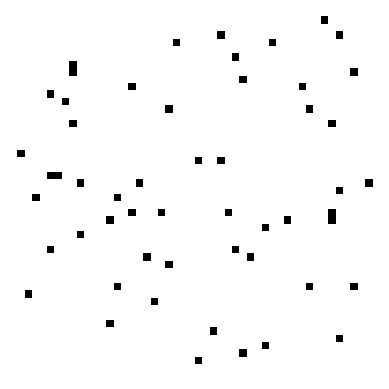

In [7]:
print('Corrupta')
plt.imshow(img_contaminada)
plt.axis('off')
plt.show()
print('Corregida')
plt.imshow(solucio_img)
plt.axis('off')
plt.show()
print('Mascara')
plt.imshow(mascara_img)
plt.axis('off')
plt.show()
